In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pickle as rick
%matplotlib widget
from ipywidgets import *
from matplotlib.widgets import Slider, Button
from matplotlib.animation import FuncAnimation

def t_max(s, m):
    return 0.5 * (m_h ** 2 - s + 2 * m ** 2 + (m_h ** 2 - s) * (1 - (4 * m ** 2) / s) ** 0.5) 

def t_min(s, m):
    return 0.5 * (m_h ** 2 - s + 2 * m ** 2 - (m_h ** 2 - s) * (1 - (4 * m ** 2) / s) ** 0.5) 

alpha = 1 / 132.184
m_W = 80.379
m_Z = 91.1876
m_e = 0.511E-3
m_m = 105.66E-3
m_h = 125.1

m = m_m
k = 0.1
E_phot_min = 5 #GeV
s_min_fix = 4 * m ** 2 
s_max_fix = m_h ** 2
t_min_fix = m ** 2
t_max_fix = (m_h - m) ** 2

e = (4 * np.pi * alpha) ** 0.5
cos = m_W / m_Z
sin = np.sqrt(1 - cos ** 2)
v = 2 * m_W * sin / e
Gam_Z = 2.4952
bins = 200

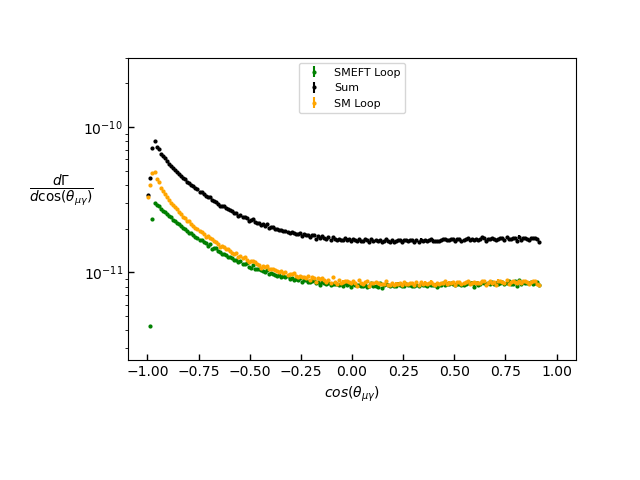

In [40]:
fig, ax = plt.subplots()
fig.subplots_adjust(left=0.2, bottom=0.25)

norm = 2 / bins
cos_s = []
for i in range(0, bins):
    cos_s += [-1 + (i + 0.5) * 2 / bins]

I_4cos = rick.load(open('I_cosloop_SM_new', 'rb'))
I_cos = rick.load(open('I_cosloop_SMEFT', 'rb'))

avg_err = np.mean(I_cos[1])
i_s = []
counter = 0

new_I_1cos = []
new_I_0cos = []
new_I_4_0cos = []
new_I_4_1cos = []
for i in I_cos[1]:
    counter += 1
    if i < 10**5 * avg_err:
        new_I_1cos.append(i)
        new_I_0cos.append(I_cos[0][counter - 1])
        new_I_4_0cos.append(I_4cos[0][counter - 1])
        new_I_4_1cos.append(I_4cos[1][counter - 1])
        i_s.append(counter - 1)

cos_snew = []
for i in i_s:
    cos_snew += [-1 + (i + 0.5) * 2 / bins]

new_mas_cos = norm * np.array([new_I_0cos, new_I_1cos, new_I_4_0cos, new_I_4_1cos])

ax.tick_params(direction='in', length=4, width=1)
ax.errorbar(cos_snew, new_mas_cos[0],  color = 'green', label = 'SMEFT Loop', yerr = new_mas_cos[1], ls = 'none', markersize = 4, marker = '.')
ax.errorbar(cos_snew, new_mas_cos[0] + new_mas_cos[2],  color = 'black', label = 'Sum', yerr = new_mas_cos[1] + new_mas_cos[3], ls = 'none', markersize = 4, marker = '.')
ax.errorbar(cos_snew, new_mas_cos[2],  color = 'orange', label = 'SM Loop', yerr = new_mas_cos[3], ls = 'none', markersize = 4, marker = '.')
plt.ylabel(r'$\frac{d\Gamma}{d\cos(\theta_{\mu\gamma})}$', rotation = '0', fontsize = 14)
ax.yaxis.set_label_coords(-0.15, 0.5)
plt.xlabel(r'$cos(\theta_{\mu\gamma})$')
plt.legend(loc='upper center', fontsize = 8)
plt.ylim(2.5 * 10**-12, 0.3 * 10**-9)
plt.yscale('log')
plt.show()

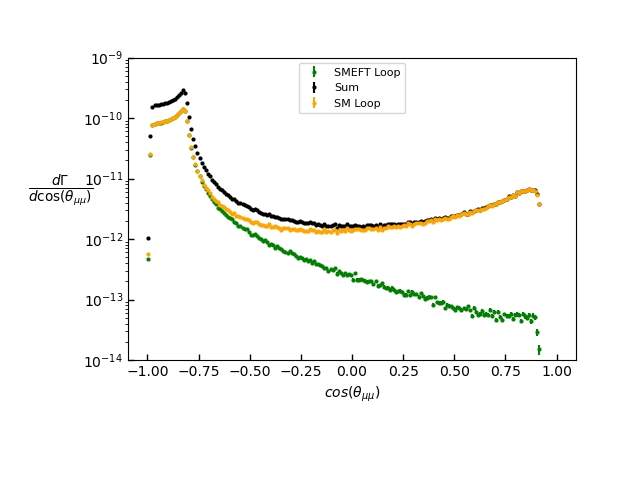

In [41]:
fig, ax = plt.subplots()
fig.subplots_adjust(left=0.2, bottom=0.25)

norm = 2 / bins
cos_s = []
for i in range(0, bins):
    cos_s += [-1 + (i + 0.5) * 2 / bins]

I_4cos_alt = rick.load(open('I_cos_altloop_SM_new', 'rb'))
I_cos_alt = rick.load(open('I_cos_altloop_SMEFT', 'rb'))

avg_err = np.mean(I_cos_alt[1])
i_s = []
counter = 0

new_I_1cos_alt = []
new_I_0cos_alt = []
new_I_4_0cos_alt = []
new_I_4_1cos_alt = []
for i in I_cos_alt[1]:
    counter += 1
    if i < 10**1 * avg_err:
        new_I_1cos_alt.append(i)
        new_I_0cos_alt.append(I_cos_alt[0][counter - 1])
        new_I_4_0cos_alt.append(I_4cos_alt[0][counter - 1])
        new_I_4_1cos_alt.append(I_4cos_alt[1][counter - 1])
        i_s.append(counter - 1)

cos_alt_snew = []
for i in i_s:
    cos_alt_snew += [-1 + (i + 0.5) * 2 / bins]

new_mas_cos_alt = norm * np.array([new_I_0cos_alt, new_I_1cos_alt, new_I_4_0cos_alt, new_I_4_1cos_alt])

ax.tick_params(direction='in', length=4, width=1)
ax.errorbar(cos_alt_snew, new_mas_cos_alt[0],  color = 'green', label = 'SMEFT Loop', yerr = new_mas_cos_alt[1], ls = 'none', markersize = 4, marker = '.')
ax.errorbar(cos_alt_snew, new_mas_cos_alt[0] + new_mas_cos_alt[2],  color = 'black', label = 'Sum', yerr = new_mas_cos_alt[1] + new_mas_cos_alt[3], ls = 'none', markersize = 4, marker = '.')
ax.errorbar(cos_alt_snew, new_mas_cos_alt[2],  color = 'orange', label = 'SM Loop', yerr = new_mas_cos_alt[3], ls = 'none', markersize = 4, marker = '.')
plt.ylabel(r'$\frac{d\Gamma}{d\cos(\theta_{\mu\mu})}$', rotation = '0', fontsize = 14)
ax.yaxis.set_label_coords(-0.15, 0.5)
plt.xlabel(r'$cos(\theta_{\mu\mu})$')
plt.legend(loc='upper center', fontsize = 8)
plt.yscale('log')
plt.ylim(10**-14, 10**-9)
plt.show()

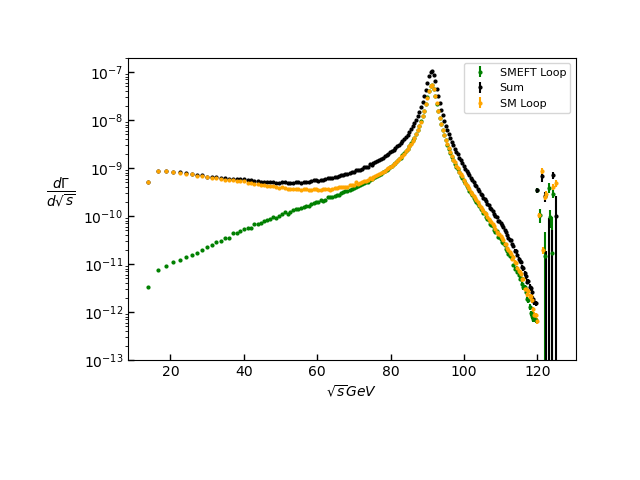

In [38]:
fig, ax = plt.subplots()
fig.subplots_adjust(left=0.2, bottom=0.25)

sqs = []
ss = []
for i in range(0, bins):
    ss += [s_min_fix + 0.5 * (s_max_fix - s_min_fix) / bins + i * (s_max_fix - s_min_fix) / bins]
    
sbins = []
for i in range(0, bins + 1):
    sbins += [i * (s_max_fix - s_min_fix) / bins]
    
sdbins = []
for i in range(0, bins):
    sdbins += [sbins[i + 1] ** 0.5 - sbins[i] ** 0.5]
    
sqs = list(np.array(ss) ** 0.5)

I = rick.load(open('I_loop_SMEFT', 'rb'))
I_4 = rick.load(open('I_loop_SM_new', 'rb'))

avg_err = np.mean(I[1])
i_s = []
counter = 0

new_I_1 = []
new_I_0 = []
new_I_4_0 = []
new_I_4_1 = []
for i in I[1]:
    counter += 1
    if i < 10**1 * avg_err:
        new_I_1.append(i)
        new_I_0.append(I[0][counter - 1])
        new_I_4_0.append(I_4[0][counter - 1])
        new_I_4_1.append(I_4[1][counter - 1])
        i_s.append(counter - 1)

sbins_new = []
for i in i_s:
    sbins_new += [i * (s_max_fix - s_min_fix) / bins]

sdbins_new = []
for i in range(len(i_s)):
    sdbins_new += [sbins[i + 1] ** 0.5 - sbins[i] ** 0.5]          

new_mas = [new_I_0, new_I_1, new_I_4_0, new_I_4_1]
for i in range(0, len(new_mas)):
    for j in range(0, len(new_mas[0])):
        new_mas[i][j] = new_mas[i][j] / sdbins_new[j]

sqs_new = []
for i in i_s:
    sqs_new.append(sqs[i])

ax.tick_params(direction='in', length=4, width=1)
ax.errorbar(sqs_new, new_mas[0],  color = 'green', label = 'SMEFT Loop', yerr = new_mas[1], ls = 'none', markersize = 4, marker = '.')
ax.errorbar(sqs_new, np.array(new_mas[0]) + np.array(new_mas[2]),  color = 'black', label = 'Sum', yerr = np.array(new_mas[1]) + np.array(new_mas[3]), ls = 'none', markersize = 4, marker = '.')
ax.errorbar(sqs_new, new_mas[2],  color = 'orange', label = 'SM Loop', yerr = new_mas[3], ls = 'none', markersize = 4, marker = '.')
plt.ylabel(r'$\frac{d\Gamma}{d\sqrt{s}}$', rotation = '0', fontsize = 14)
ax.yaxis.set_label_coords(-0.15, 0.5)
plt.ylim(10**-13, 2 * 10**-7)
plt.xlabel(r'$\sqrt{s} GeV$')
plt.legend(loc= 'best', fontsize = 8)
plt.yscale('log')
plt.show()

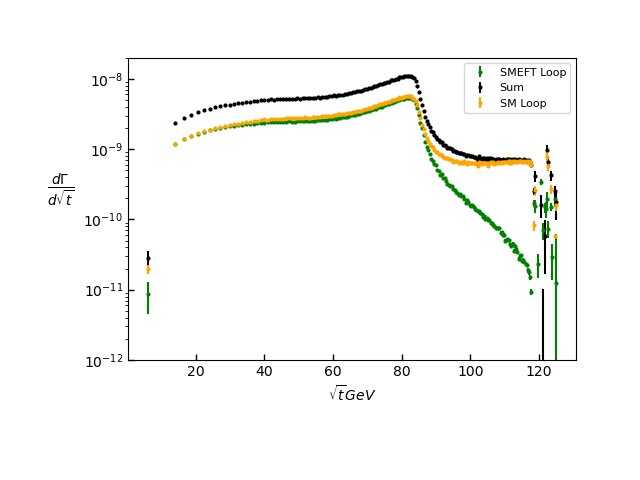

In [35]:
fig, ax = plt.subplots()
fig.subplots_adjust(left=0.2, bottom=0.25)

sqt = []
ts = []
for i in range(0, bins):
    ts += [t_min_fix + 0.5 * (t_max_fix - t_min_fix) / bins + i * (t_max_fix - t_min_fix) / bins]
    
tbins = []
for i in range(0, bins + 1):
    tbins += [i * (t_max_fix - t_min_fix) / bins]
    
tdbins = []
for i in range(0, bins):
    tdbins += [tbins[i + 1] ** 0.5 - tbins[i] ** 0.5]
    
sqt = np.array(ts) ** 0.5

I_t = rick.load(open('I_tloop_SMEFT', 'rb'))
I_4_t = rick.load(open('I_tloop_SM_new', 'rb'))

avg_err = np.mean(I_t[1])
i_s = []
counter = 0

new_I_1t = []
new_I_0t = []
new_I_4_0t = []
new_I_4_1t = []
for i in I_t[1]:
    counter += 1
    if i < 10**1 * avg_err:
        new_I_1t.append(i)
        new_I_0t.append(I_t[0][counter - 1])
        new_I_4_0t.append(I_4_t[0][counter - 1])
        new_I_4_1t.append(I_4_t[1][counter - 1])
        i_s.append(counter - 1)

tbins_new = []
for i in i_s:
    tbins_new += [i * (t_max_fix - t_min_fix) / bins]

tdbins_new = []
for i in range(len(i_s)):
    tdbins_new += [tbins[i + 1] ** 0.5 - tbins[i] ** 0.5]          

new_mast = [new_I_0t, new_I_1t, new_I_4_0t, new_I_4_1t]
for i in range(0, len(new_mast)):
    for j in range(0, len(new_mast[0])):
        new_mast[i][j] = new_mast[i][j] / tdbins_new[j]
        
sqt_new = []
for i in i_s:
    sqt_new.append(sqt[i])
#print(I_t)
ax.tick_params(direction='in', length=4, width=1)
ax.errorbar(sqt_new, new_mast[0],  color = 'green', label = 'SMEFT Loop', yerr = new_mast[1], ls = 'none', markersize = 4, marker = '.')
ax.errorbar(sqt_new, np.array(new_mast[0]) + np.array(new_mast[2]),  color = 'black', label = 'Sum', yerr = np.array(new_mast[1]) + np.array(new_mast[3]), ls = 'none', markersize = 4, marker = '.')
ax.errorbar(sqt_new, new_mast[2],  color = 'orange', label = 'SM Loop', yerr = new_mast[3], ls = 'none', markersize = 4, marker = '.')
plt.ylabel(r'$\frac{d\Gamma}{d\sqrt{t}}$', rotation = '0', fontsize = 14)
ax.yaxis.set_label_coords(-0.15, 0.5)
plt.ylim(10**-12, 2 * 10**-8)
plt.xlabel(r'$\sqrt{t} GeV$')
plt.legend(loc= 'best', fontsize = 8)
plt.yscale('log')
plt.show()

In [ ]:
2.0888678702333574e-07 1.9291057283245392e-10 SMEFT LOOP INT

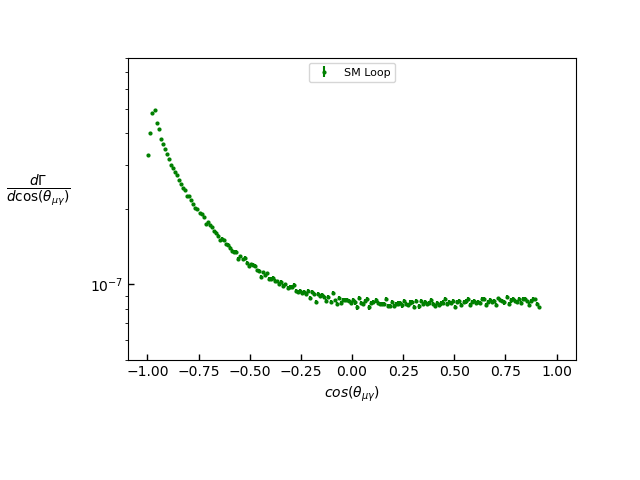

In [33]:
fig, ax = plt.subplots()
fig.subplots_adjust(left=0.2, bottom=0.25)

norm = 2 / bins
cos_s = []
for i in range(0, bins):
    cos_s += [-1 + (i + 0.5) * 2 / bins]

I_cos = rick.load(open('I_cosloop_SM_new', 'rb'))
#I_4cos = rick.load(open('I_4_1mas_sep1', 'rb'))

avg_err = np.mean(I_cos[1])
i_s = []
counter = 0

new_I_1cos = []
new_I_0cos = []
#new_I_4_0cos = []
#new_I_4_1cos = []
for i in I_cos[1]:
    counter += 1
    if i < 10**10 * avg_err:
        new_I_1cos.append(i)
        new_I_0cos.append(I_cos[0][counter - 1])
        #new_I_4_0cos.append(I_4cos[0][counter - 1])
        #new_I_4_1cos.append(I_4cos[1][counter - 1])
        i_s.append(counter - 1)

cos_snew = []
for i in i_s:
    cos_snew += [-1 + (i + 0.5) * 2 / bins]

new_mas_cos = (1 / norm) * np.array([new_I_0cos, new_I_1cos])#, new_I_4_0cos, new_I_4_1cos])
ax.tick_params(direction='in', length=4, width=1)
ax.errorbar(cos_snew, new_mas_cos[0],  color = 'green', label = 'SM Loop', yerr = new_mas_cos[1], ls = 'none', markersize = 4, marker = '.')
#ax.errorbar(cos_snew, new_mas_cos[0] + new_mas_cos[2],  color = 'black', label = 'Sum', yerr = new_mas_cos[1] + new_mas_cos[3], ls = 'none', markersize = 4, marker = '.')
#ax.errorbar(cos_snew, new_mas_cos[2],  color = 'orange', label = 'SM Tree', yerr = new_mas_cos[3], ls = 'none', markersize = 4, marker = '.')
plt.ylabel(r'$\frac{d\Gamma}{d\cos(\theta_{\mu\gamma})}$', rotation = '0', fontsize = 14)
ax.yaxis.set_label_coords(-0.2, 0.5)
plt.xlabel(r'$cos(\theta_{\mu\gamma})$')
plt.legend(loc='upper center', fontsize = 8)
plt.ylim(5 * 10**-8, 8 * 10**-7)
plt.yscale('log')
plt.show()

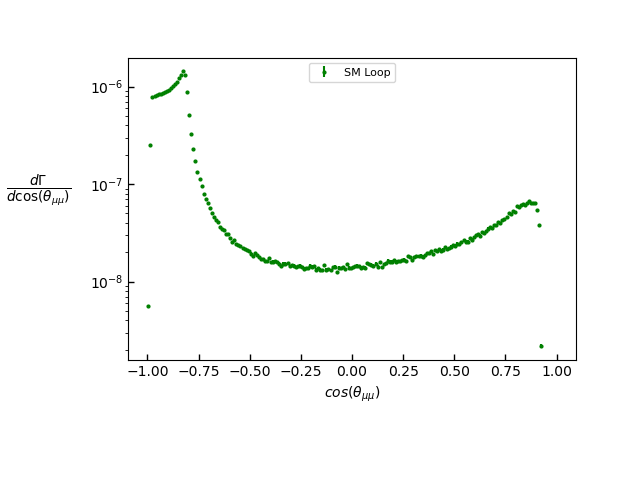

In [27]:
fig, ax = plt.subplots()
fig.subplots_adjust(left=0.2, bottom=0.25)

norm = 2 / bins
cos_s = []
for i in range(0, bins):
    cos_s += [-1 + (i + 0.5) * 2 / bins]

I_cos_alt = rick.load(open('I_cos_altloop_SM_new', 'rb'))
#I_4cos_alt = rick.load(open('I_4_1mas_sep1', 'rb'))

avg_err = np.mean(I_cos_alt[1])
i_s = []
counter = 0

new_I_1cos_alt = []
new_I_0cos_alt = []
#new_I_4_0cos_alt = []
#new_I_4_1cos_alt = []
for i in I_cos_alt[1]:
    counter += 1
    if i < 10**1 * avg_err:
        new_I_1cos_alt.append(i)
        new_I_0cos_alt.append(I_cos_alt[0][counter - 1])
        #new_I_4_0cos_alt.append(I_4cos_alt[0][counter - 1])
        #new_I_4_1cos_alt.append(I_4cos_alt[1][counter - 1])
        i_s.append(counter - 1)

cos_alt_snew = []
for i in i_s:
    cos_alt_snew += [-1 + (i + 0.5) * 2 / bins]

new_mas_cos_alt = (1 / norm) * np.array([new_I_0cos_alt, new_I_1cos_alt])#, new_I_4_0cos_alt, new_I_4_1cos_alt])

ax.tick_params(direction='in', length=4, width=1)
ax.errorbar(cos_alt_snew, new_mas_cos_alt[0],  color = 'green', label = 'SM Loop', yerr = new_mas_cos_alt[1], ls = 'none', markersize = 4, marker = '.')
#ax.errorbar(cos_alt_snew, new_mas_cos_alt[0] + new_mas_cos_alt[2],  color = 'black', label = 'Sum', yerr = new_mas_cos_alt[1] + new_mas_cos_alt[3], ls = 'none', markersize = 4, marker = '.')
#ax.errorbar(cos_alt_snew, new_mas_cos_alt[2],  color = 'orange', label = 'SM Tree', yerr = new_mas_cos_alt[3], ls = 'none', markersize = 4, marker = '.')
plt.ylabel(r'$\frac{d\Gamma}{d\cos(\theta_{\mu\mu})}$', rotation = '0', fontsize = 14)
ax.yaxis.set_label_coords(-0.2, 0.5)
plt.xlabel(r'$cos(\theta_{\mu\mu})$')
plt.legend(loc='upper center', fontsize = 8)
plt.yscale('log')
plt.show()

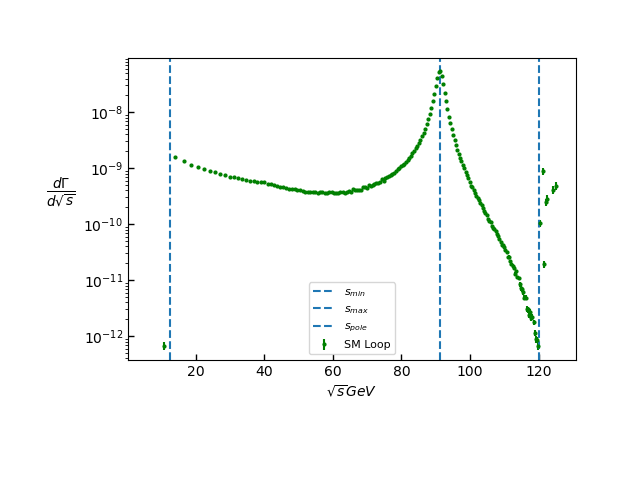

In [25]:
fig, ax = plt.subplots()
fig.subplots_adjust(left=0.2, bottom=0.25)

m = m_m
s_min_fix = 4 * m ** 2 
s_max_fix = m_h ** 2
t_min_fix = m ** 2
t_max_fix = (m_h - m) ** 2

sqs = []
ss = []
for i in range(0, bins):
    ss += [s_min_fix + 0.5 * (s_max_fix - s_min_fix) / bins + i * (s_max_fix - s_min_fix) / bins]
    
sbins = []
for i in range(0, bins + 1):
    sbins += [i * (s_max_fix - s_min_fix) / bins]
    
sdbins = []
for i in range(0, bins):
    sdbins += [sbins[i + 1] ** 0.5 - sbins[i] ** 0.5]
    
sqs = list(np.array(ss) ** 0.5)

I = rick.load(open('I_loop_SM_new', 'rb'))
#I_4 = rick.load(open('I_4_1mas_sep1', 'rb'))

avg_err = np.mean(I[1])
i_s = []
counter = 0

new_I_1 = []
new_I_0 = []
#new_I_4_0 = []
#new_I_4_1 = []
for i in I[1]:
    counter += 1
    if i < 10**10* avg_err:
        new_I_1.append(i)
        new_I_0.append(I[0][counter - 1])
        #new_I_4_0.append(I_4[0][counter - 1])
        #new_I_4_1.append(I_4[1][counter - 1])
        i_s.append(counter - 1)

sbins_new = []
for i in i_s:
    sbins_new += [i * (s_max_fix - s_min_fix) / bins]

sdbins_new = []
for i in range(len(i_s)):
    sdbins_new += [sbins[i + 1] ** 0.5 - sbins[i] ** 0.5]          

new_mas = [new_I_0, new_I_1]#, new_I_4_0, new_I_4_1]
for i in range(0, len(new_mas)):
    for j in range(0, len(new_mas[0])):
        new_mas[i][j] = new_mas[i][j] / sdbins_new[j]

sqs_new = []
for i in i_s:
    sqs_new.append(sqs[i])

ax.tick_params(direction='in', length=4, width=1)
ax.errorbar(sqs_new, new_mas[0],  color = 'green', label = 'SM Loop', yerr = new_mas[1], ls = 'none', markersize = 4, marker = '.')
#ax.errorbar(sqs_new, np.array(new_mas[0]) + np.array(new_mas[2]),  color = 'black', label = 'Sum', yerr = np.array(new_mas[1]) + np.array(new_mas[3]), ls = 'none', markersize = 4, marker = '.')
#ax.errorbar(sqs_new, new_mas[2],  color = 'orange', label = 'SM Tree', yerr = new_mas[3], ls = 'none', markersize = 4, marker = '.')
plt.ylabel(r'$\frac{d\Gamma}{d\sqrt{s}}$', rotation = '0', fontsize = 14)
ax.yaxis.set_label_coords(-0.15, 0.5)
#plt.ylim(-10**-7, 10**-7)
plt.axvline(k * m_h, linestyle = '--', label = r'$s_{min}$')
plt.axvline((m_h ** 2 - 2 * m_h * E_phot_min) ** 0.5, linestyle = '--', label = r'$s_{max}$')
plt.axvline(m_Z, linestyle = '--', label = r'$s_{pole}$')
plt.xlabel(r'$\sqrt{s} GeV$')
plt.legend(loc= 'best', fontsize = 8)
plt.yscale('log')
plt.show()

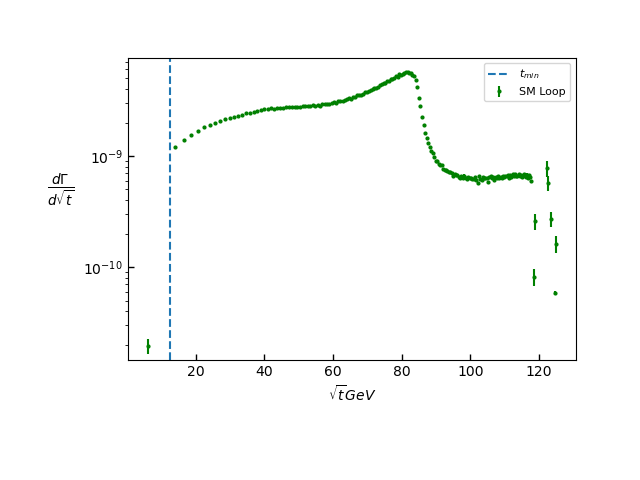

In [26]:
fig, ax = plt.subplots()
fig.subplots_adjust(left=0.2, bottom=0.25)

m = m_m
s_min_fix = 4 * m ** 2 
s_max_fix = m_h ** 2
t_min_fix = m ** 2
t_max_fix = (m_h - m) ** 2

sqt = []
ts = []
for i in range(0, bins):
    ts += [t_min_fix + 0.5 * (t_max_fix - t_min_fix) / bins + i * (t_max_fix - t_min_fix) / bins]
    
tbins = []
for i in range(0, bins + 1):
    tbins += [i * (t_max_fix - t_min_fix) / bins]
    
tdbins = []
for i in range(0, bins):
    tdbins += [tbins[i + 1] ** 0.5 - tbins[i] ** 0.5]
    
sqt = np.array(ts) ** 0.5

I_t = rick.load(open('I_tloop_SM_new', 'rb'))
#I_4_t = rick.load(open('I_4_1tmas_sep1', 'rb'))

avg_err = np.mean(I_t[1])
i_s = []
counter = 0

new_I_1t = []
new_I_0t = []
#new_I_4_0t = []
#new_I_4_1t = []
for i in I_t[1]:
    counter += 1
    if i < 10**10 * avg_err:
        new_I_1t.append(i)
        new_I_0t.append(I_t[0][counter - 1])
        #new_I_4_0t.append(I_4_t[0][counter - 1])
        #new_I_4_1t.append(I_4_t[1][counter - 1])
        i_s.append(counter - 1)

tbins_new = []
for i in i_s:
    tbins_new += [i * (t_max_fix - t_min_fix) / bins]

tdbins_new = []
for i in range(len(i_s)):
    tdbins_new += [tbins[i + 1] ** 0.5 - tbins[i] ** 0.5]          

new_mast = [new_I_0t, new_I_1t]#, new_I_4_0t, new_I_4_1t]
for i in range(0, len(new_mast)):
    for j in range(0, len(new_mast[0])):
        new_mast[i][j] = new_mast[i][j] / tdbins_new[j]
        
sqt_new = []
for i in i_s:
    sqt_new.append(sqt[i])

ax.tick_params(direction='in', length=4, width=1)
ax.errorbar(sqt_new, new_mast[0],  color = 'green', label = 'SM Loop', yerr = new_mast[1], ls = 'none', markersize = 4, marker = '.')
#ax.errorbar(sqt_new, np.array(new_mast[0]) + np.array(new_mast[2]),  color = 'black', label = 'Sum', yerr = np.array(new_mast[1]) + np.array(new_mast[3]), ls = 'none', markersize = 4, marker = '.')
#ax.errorbar(sqt_new, new_mast[2],  color = 'orange', label = 'SM Tree', yerr = new_mast[3], ls = 'none', markersize = 4, marker = '.')
plt.ylabel(r'$\frac{d\Gamma}{d\sqrt{t}}$', rotation = '0', fontsize = 14)
ax.yaxis.set_label_coords(-0.15, 0.5)
#plt.ylim(10**-10, 10**-8)
plt.xlabel(r'$\sqrt{t} GeV$')
plt.axvline(k * m_h, linestyle = '--', label = r'$t_{min}$')
#plt.axvline((m_h ** 2 - 2 * m_h * E_phot_min) ** 0.5, linestyle = '--', label = r'$s_{max}$')
plt.legend(loc= 'best', fontsize = 8)
plt.yscale('log')
plt.show()